# Face Recognition with Olivetti Dataset

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection

### Load the Dataset

In [300]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [301]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


Reshape the target data

In [302]:
#target_data = target_data.reshape((400, 1,1)) # RESHAPE WRONG
print(f"Target data shape: {target_data.shape}")
print(target_data)
print(data)

Target data shape: (400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 

### Get 6 random people face from the data

[2, 29, 24, 11, 37, 38]


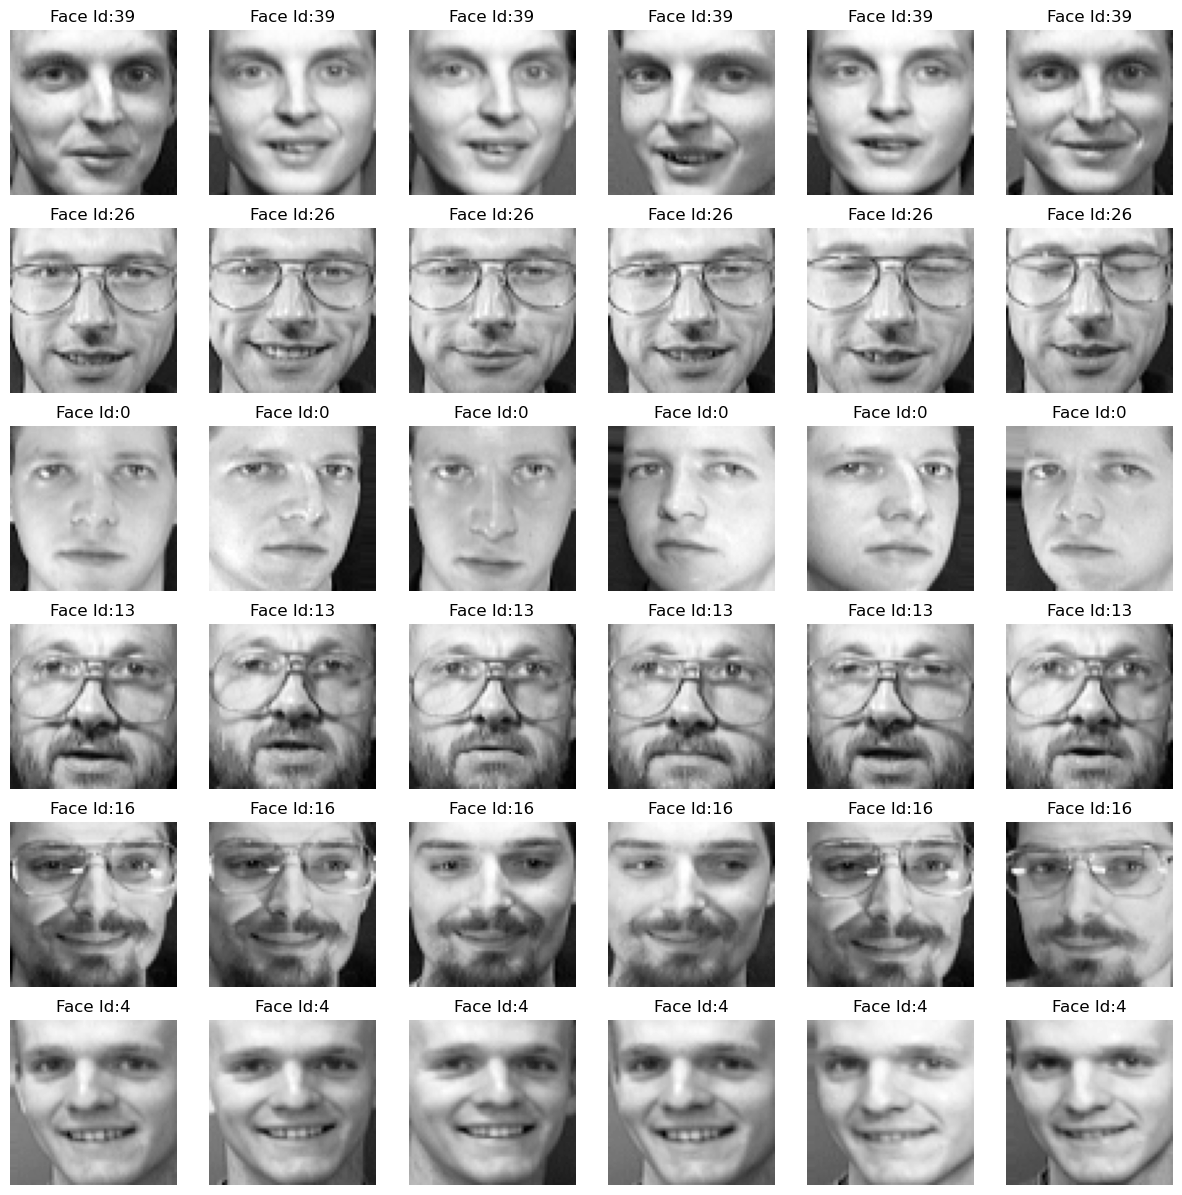

In [303]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)
print(face_id)

'''
face_id = set(face_id)
while len(face_id) < rows:
    face_id.add(random.randint(0, 39))
face_id = sorted(face_id)
print(face_id)
'''

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

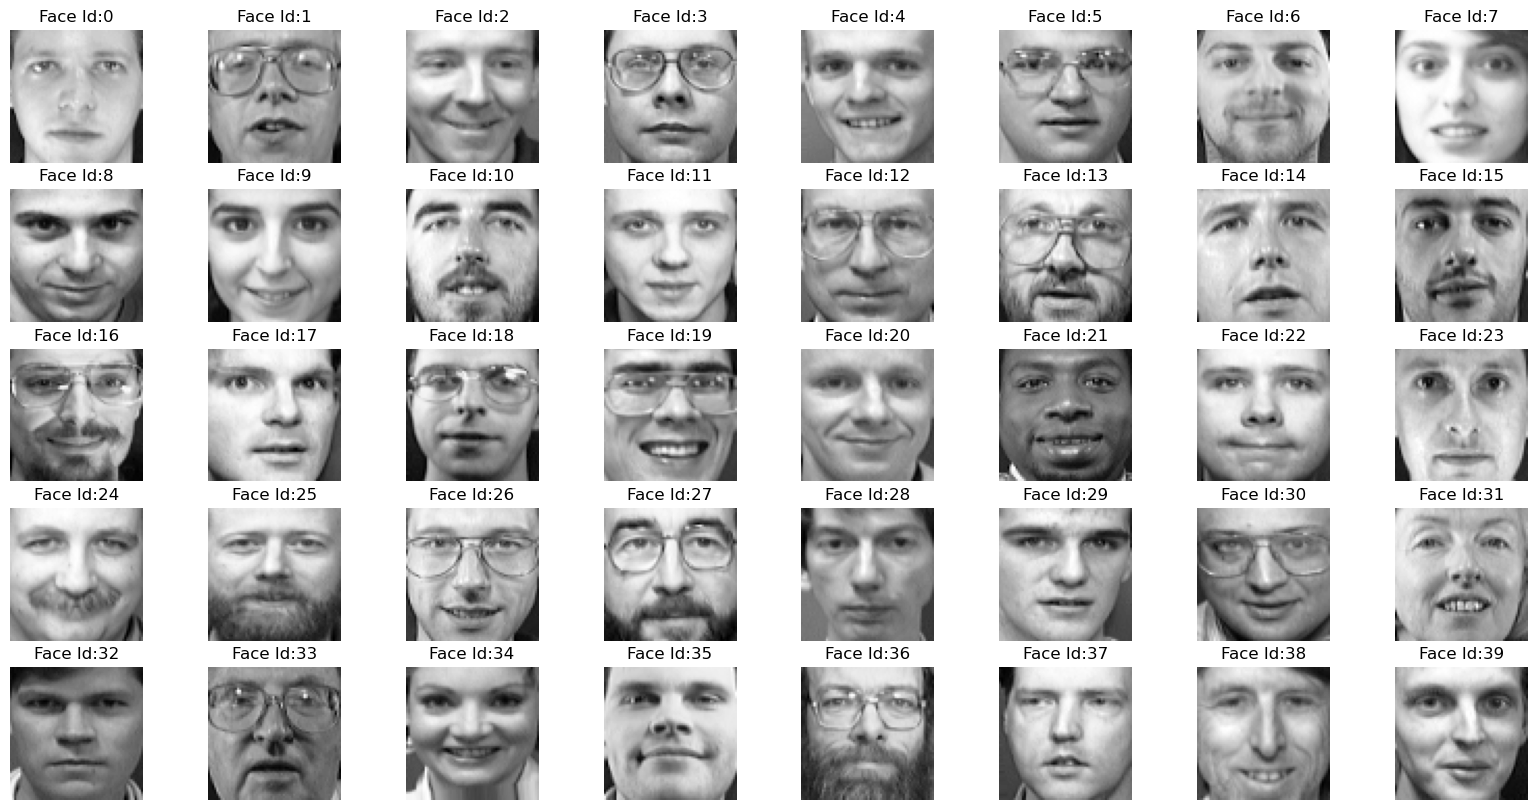

In [304]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Get 6 random people face from the target data

In [305]:
'''
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = random.sample(range(0,40), rows)
print(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")
'''

'\nrows = 6\ncols = 6\n\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\n\nface_id = random.sample(range(0,40), rows)\nprint(face_id)\n\nfor i, face_id in enumerate(face_id):\n    for j in range(cols):\n        image_index=face_id * 10 + j\n        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")\n        ax[i,j].set_title("Face Id:{}".format(face_id))\n        ax[i,j].axis("off")\n'

Convert matrix form (image data) to a vector 

In [306]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


### Split Data into Train and Test

In [307]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


# Normalization

In [80]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

### Distribuiton of the dataset


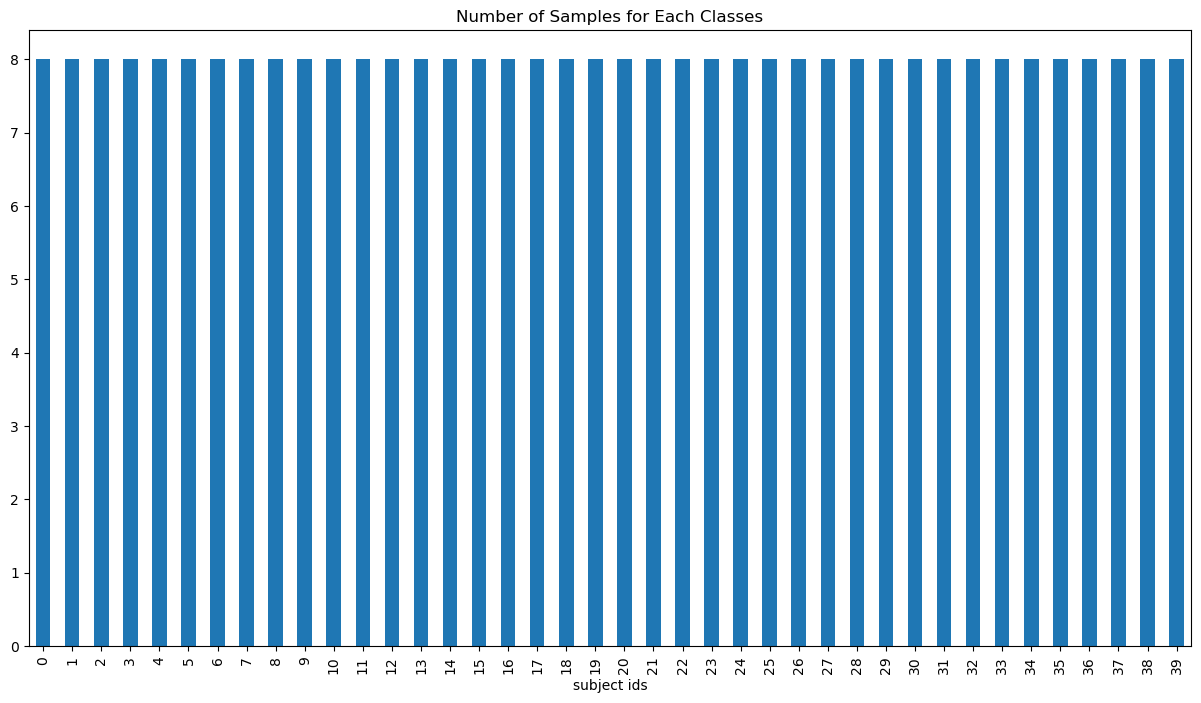

In [308]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

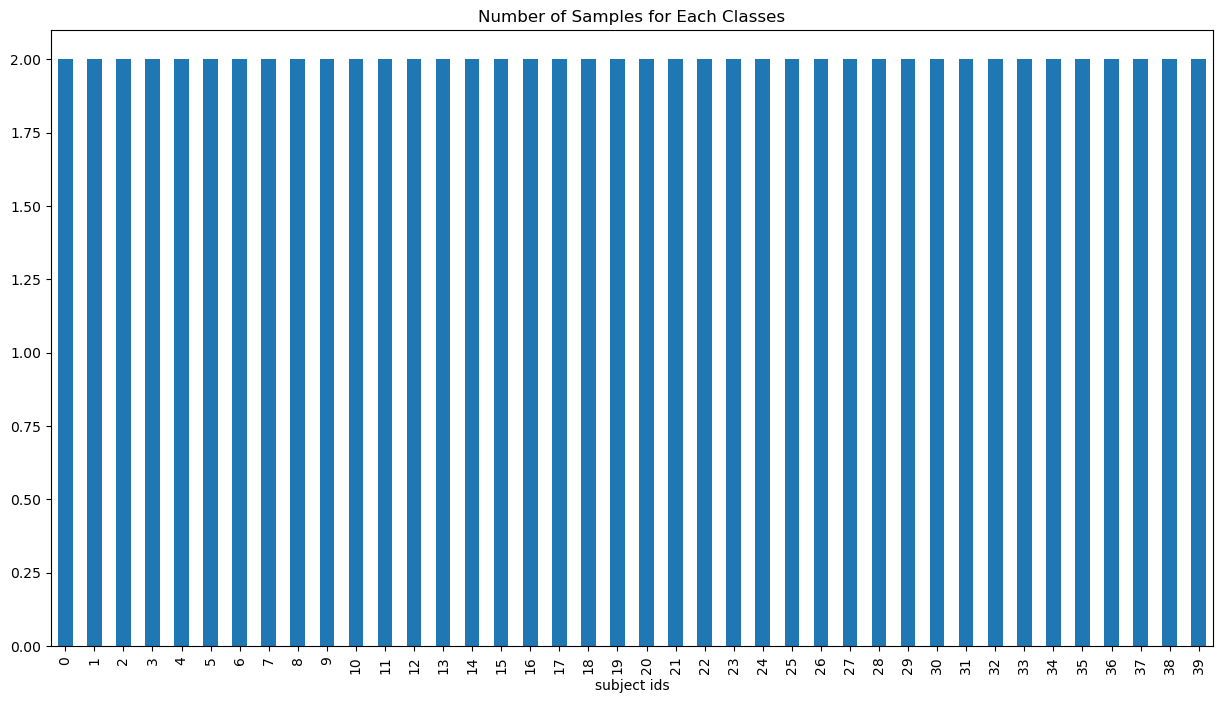

In [309]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

# PCA

In [310]:
from sklearn.decomposition import PCA

In [311]:
'''
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)    
plt.title("PCA of the test set")
plt.legend()
plt.show()
'''

'\npca = PCA(n_components=2)\npca.fit(X_train)\n\nX_train_pca = pca.transform(X_train)\nX_test_pca = pca.transform(X_test)\n\nprint(f"X_train_pca shape: {X_train_pca.shape}")\nprint(f"X_test_pca shape: {X_test_pca.shape}")\n\nplt.figure(figsize=(15,8))\n\nfor i in range(40):\n    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)\nplt.title("PCA of the training set")\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(15,8))\n\nfor i in range(40):\n    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)    \nplt.title("PCA of the test set")\nplt.legend()\nplt.show()\n'

Show one face

In [312]:
'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

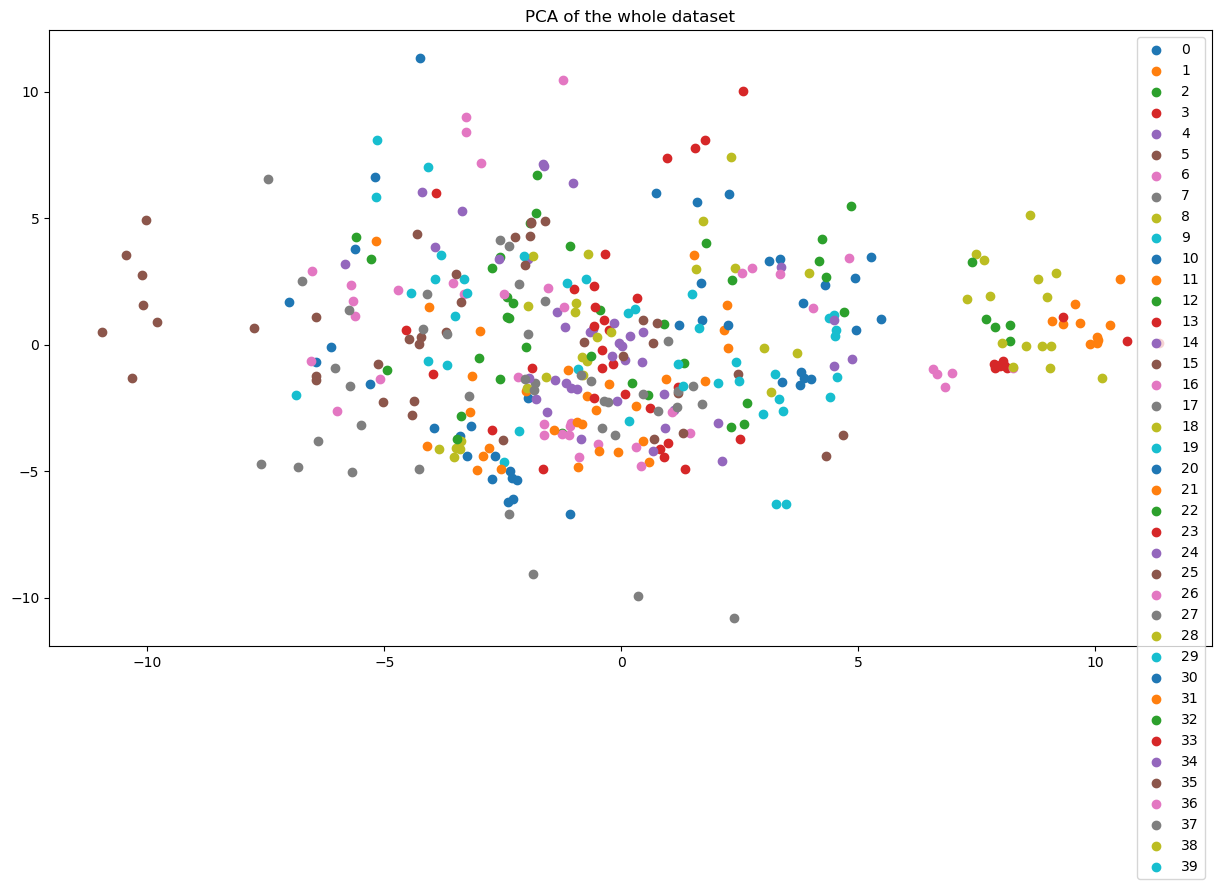

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

In [313]:
pca = PCA(n_components=2)
pca.fit(data)

X_pca = pca.transform(data)

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_pca[target_data == i, 0], X_pca[target_data == i, 1], label=i)
plt.title("PCA of the whole dataset")
plt.legend()
plt.show()

'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''



Finding Optimum Number of Principle Component

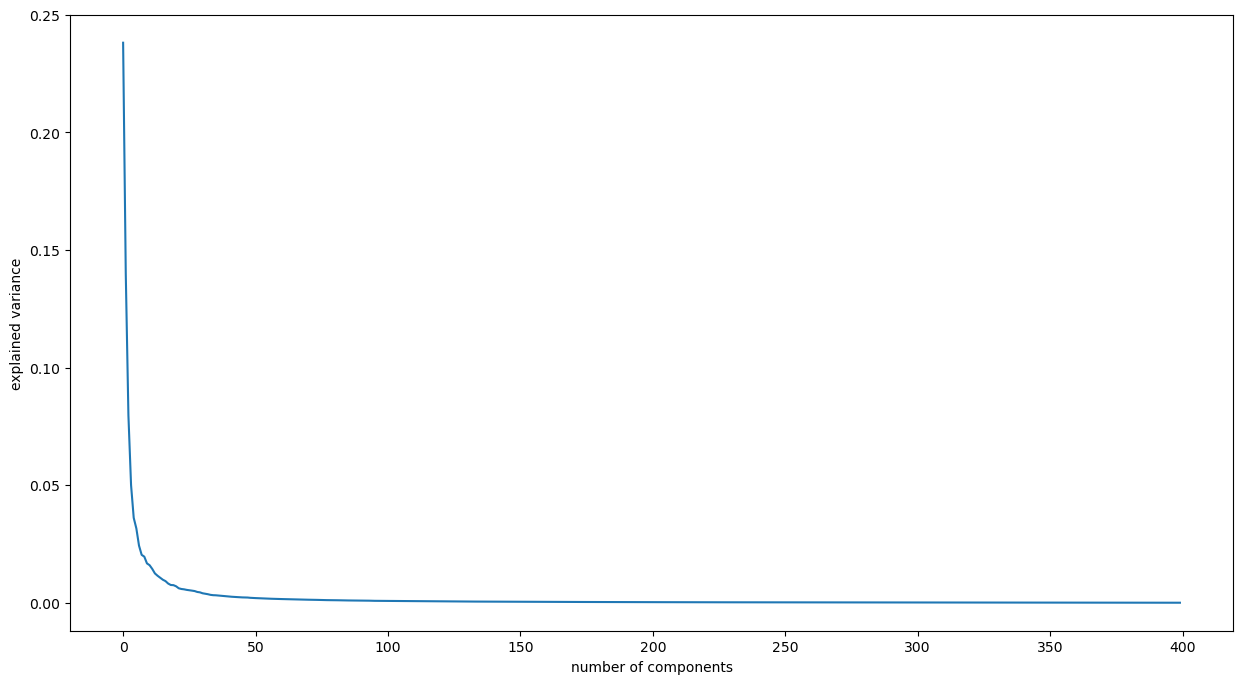

In [314]:
pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


X_train_pca shape: (320, 50)
X_test_pca shape: (80, 50)
0.8784755


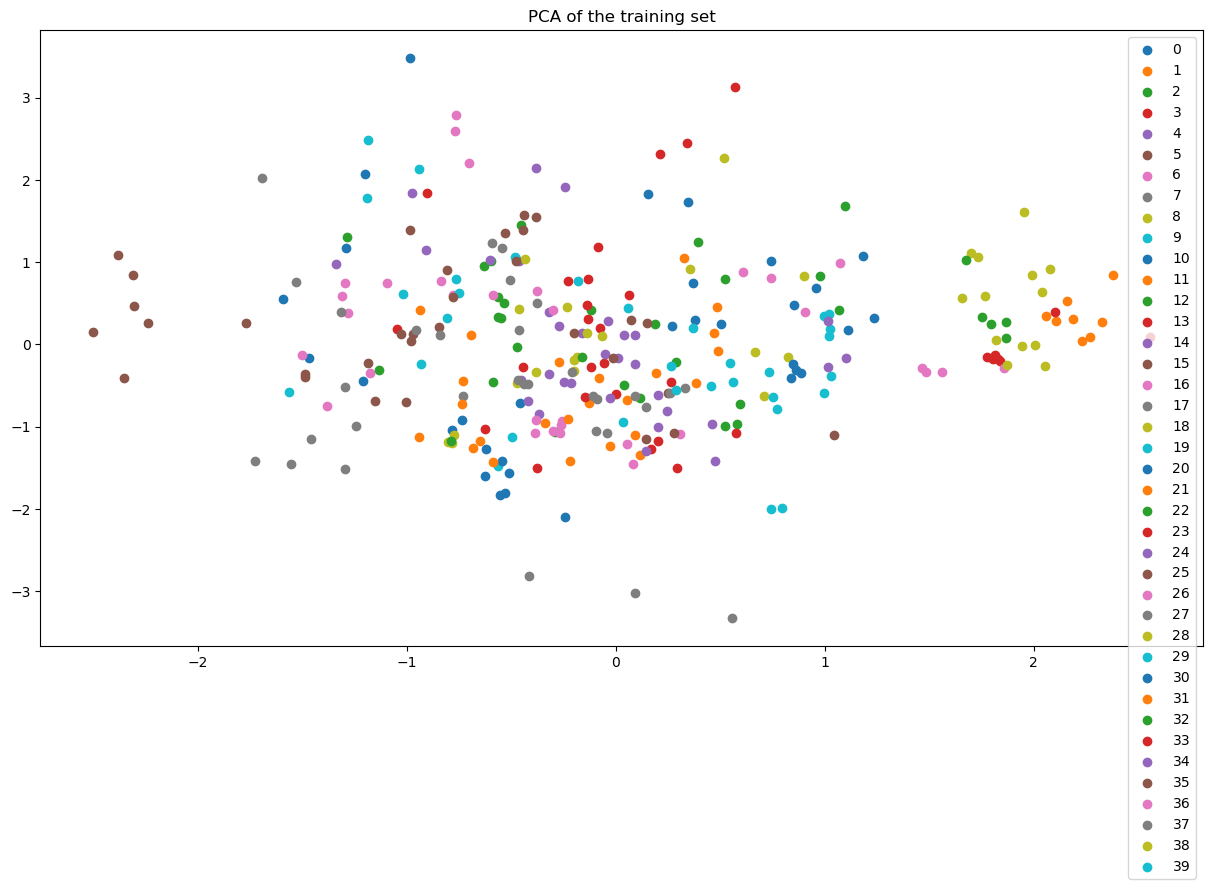

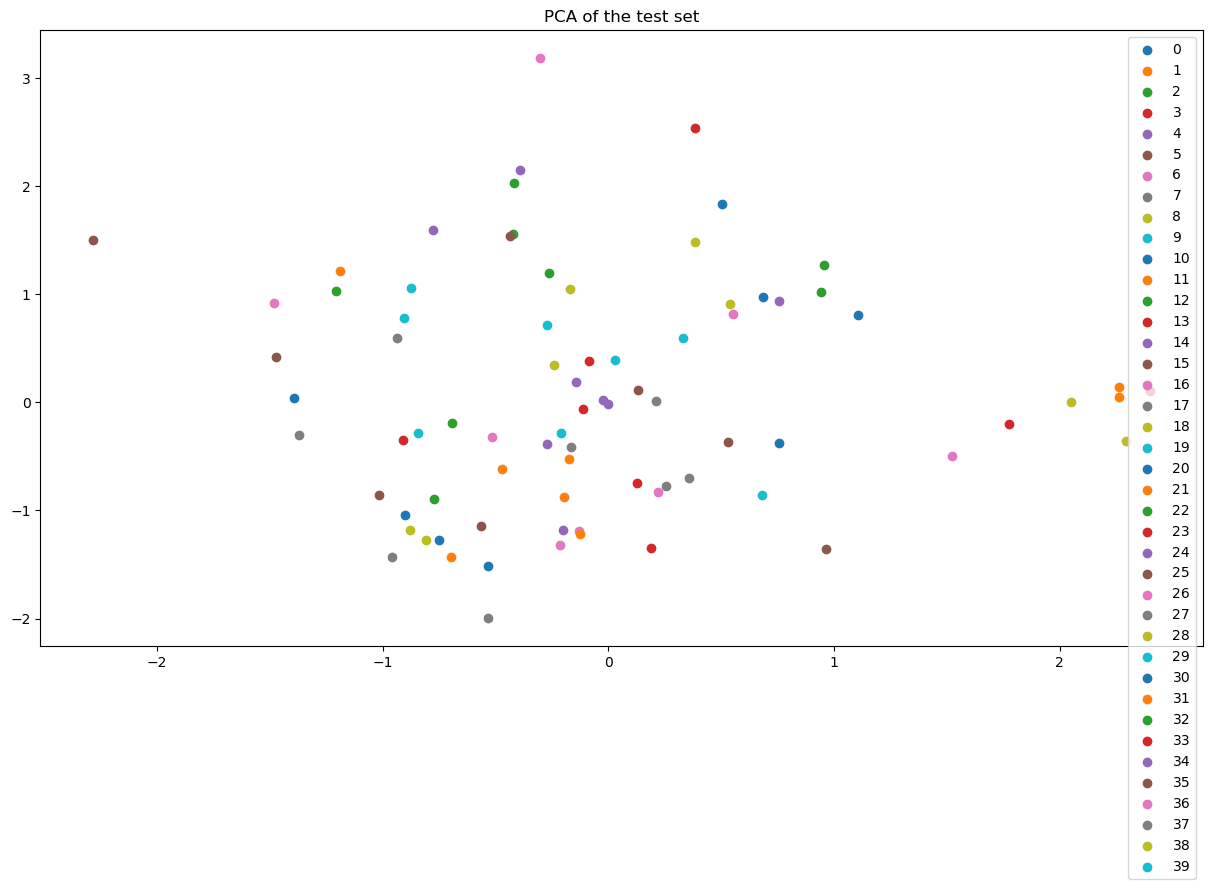

In [315]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")


print(pca.explained_variance_ratio_.sum())


plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show Average Face after PCA

(-0.5, 63.5, 63.5, -0.5)

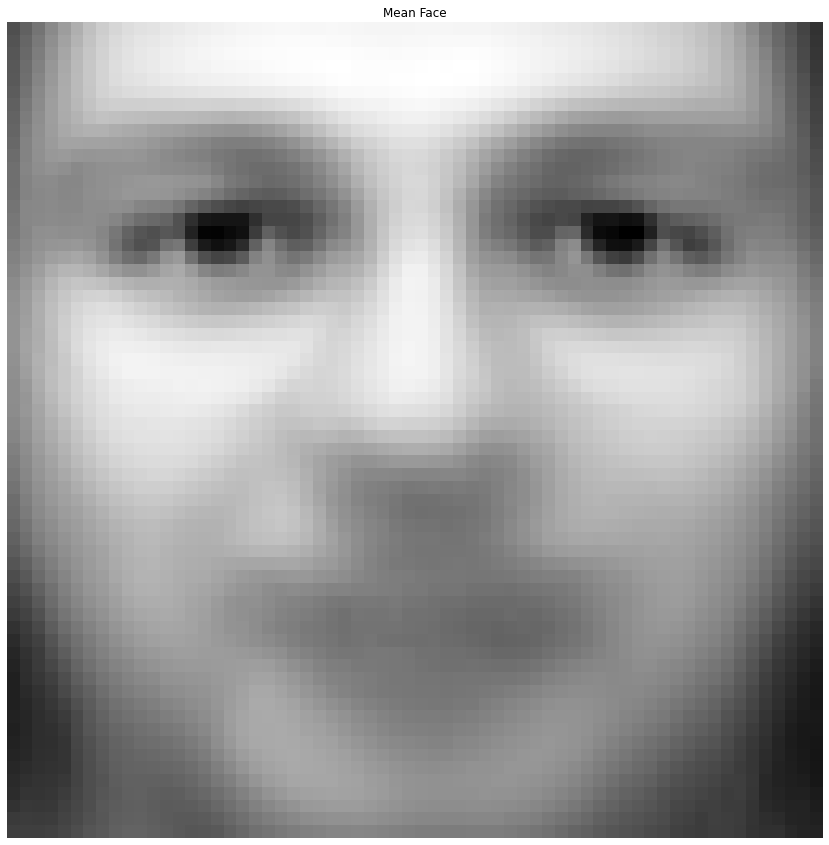

In [89]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title("Mean Face")
ax.axis("off")

Show all faces after PCA

ValueError: cannot reshape array of size 204800 into shape (90,64,64)

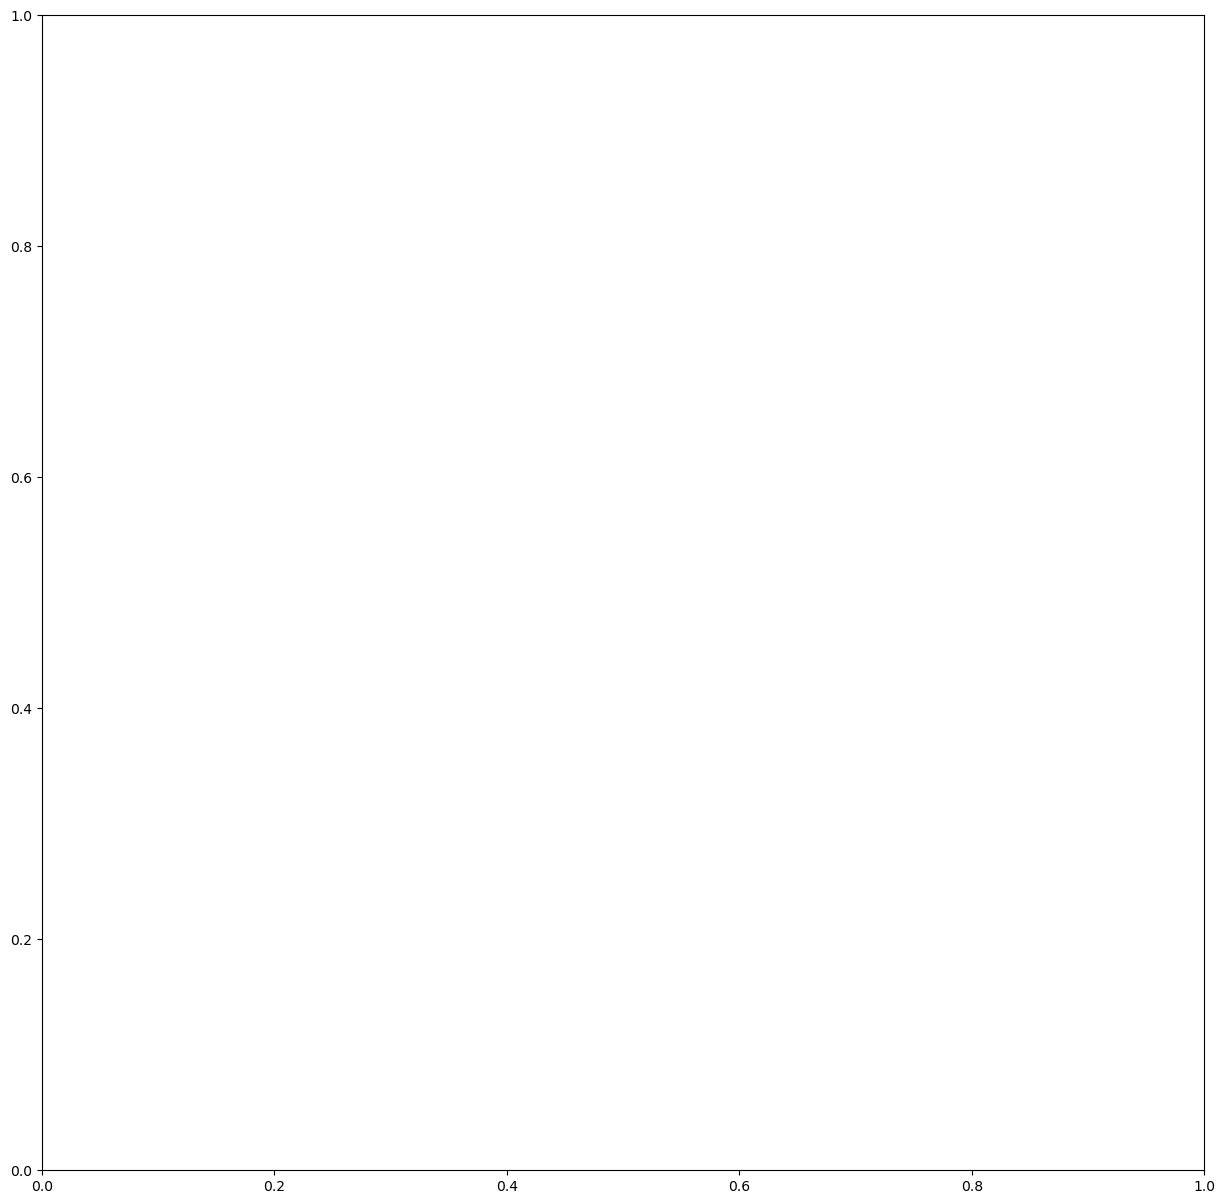

In [316]:
# show all faces after above PCA
number_of_eigenfaces=len(pca.components_)
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[1], cmap="gray")
ax.set_title("Second Principal Component")
ax.axis("off")

'''
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))
print(number_of_eigenfaces)
print(eigen_faces.shape)
print(eigen_faces.size)

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    print(i)
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_title("eigen id:{}".format(i))
'''


In [347]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, classification_report
import seaborn as sns

def train(model, X_train, X_test, y_train, y_test ):
    print("Training Model: ", model.__class__.__name__)
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    test_data_acc = accuracy_score(y_test, y_pred)
    
    print("Accuracy: ", test_data_acc)
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    
    fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,7))
    ax[0] = sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0] = plt.title('Confusion matrix')
    ax[0] = plt.ylabel('Actual label')
    ax[0] = plt.xlabel('Predicted label')
    
    ax[1] = sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1] = plt.title('Confusion matrix')
    ax[1] = plt.ylabel('Actual label')
    ax[1] = plt.xlabel('Predicted label')
    
    """model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_train)
    #test_data_acc = accuracy_score(y_test, y_pred)
    
    #print("Accuracy: ", test_data_acc)
    
    cm = confusion_matrix(y_train, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    """
    
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))
    
def hyper_parameter(hypertuned_model, parameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, parameters, scoring="accuracy")
    model.fit(X_train, np.ravel(y_train))
    print(" Best Params: ", model.best_params_)
    return model.best_params_

def k_fold_cross_validation(model, k , X_train, y_train):
    print("K-Fold Cross Validation for :", model.__class__.__name__)
    kfold = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, np.ravel(y_train), scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def validationCurve(parameter_list, parameter_name, X_train, y_train, model):
    print("Validation Curve for :", model.__class__.__name__)
    train_scores, valid_scores = validation_curve(model, X_train, np.ravel(y_train), param_name = parameter_name, param_range = parameter_list, cv=5, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)

    plt.plot(parameter_list, train_scores_mean, label = "Train", color = 'b')
    plt.plot(parameter_list, test_scores_mean, label = "Cross Validation", color = 'r')
    plt.title("Validation Curve")
    plt.xlabel(parameter_name)
    plt.ylabel("Score")
    plt.legend()
    plt.show()

Training Model:  LinearDiscriminantAnalysis
Accuracy:  1.0
Confusion Matrix: 
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.0

/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       0.25      0.50      0.33         2
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.33      0.50      0.40         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
    

/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
    

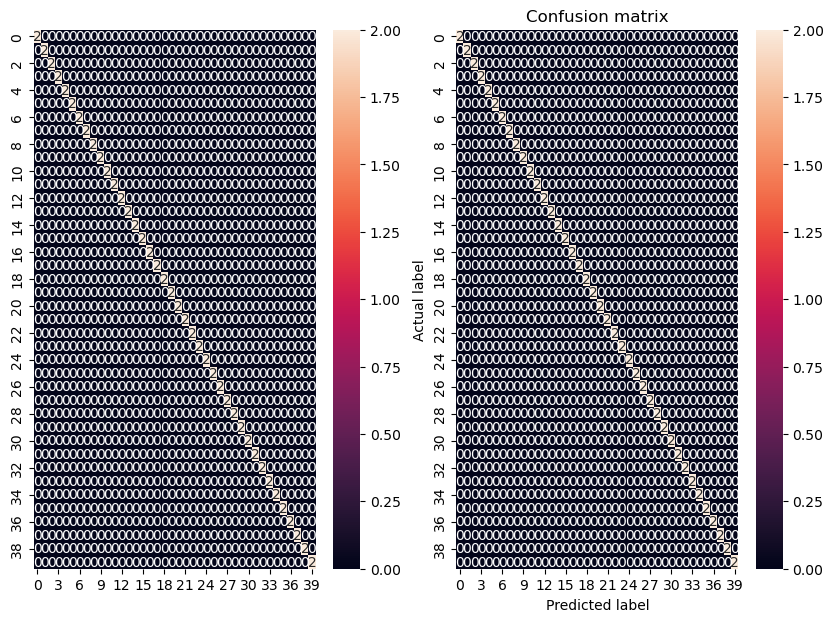

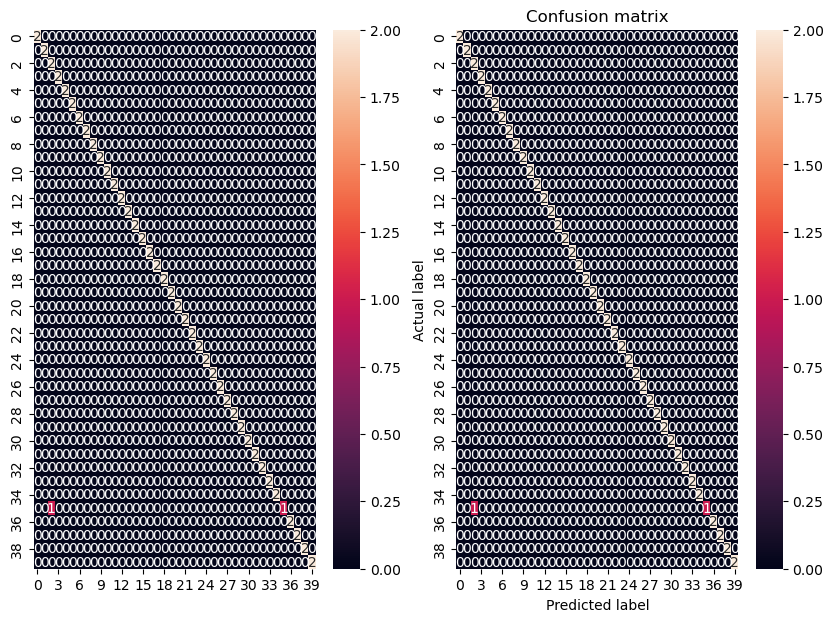

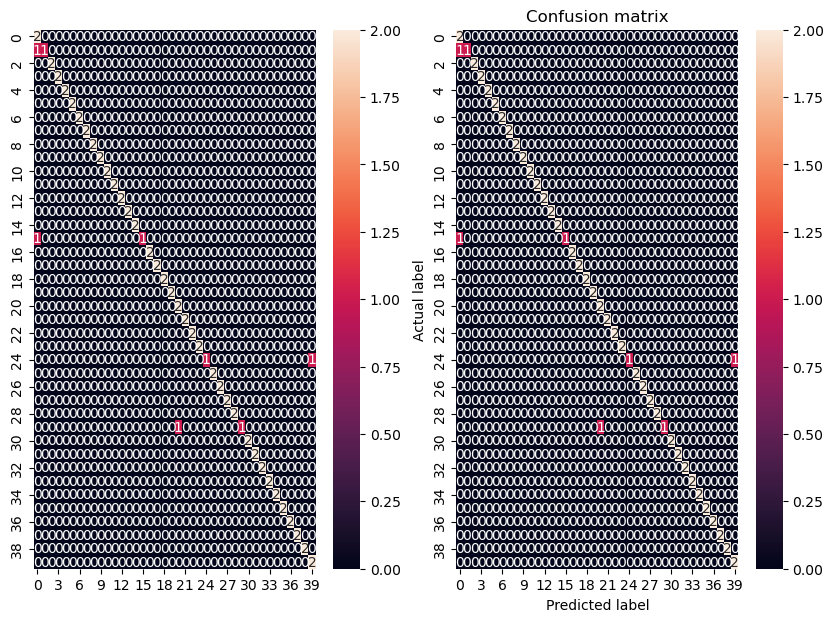

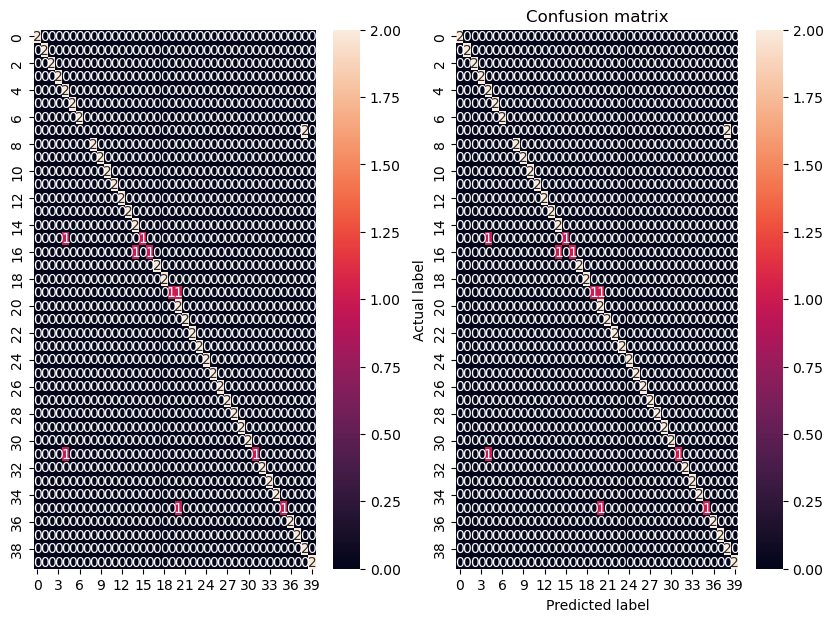

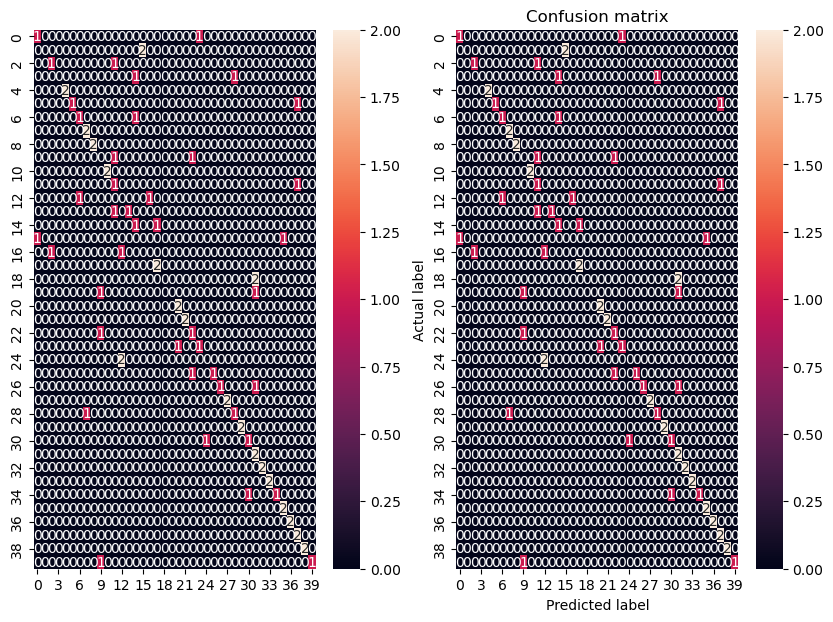

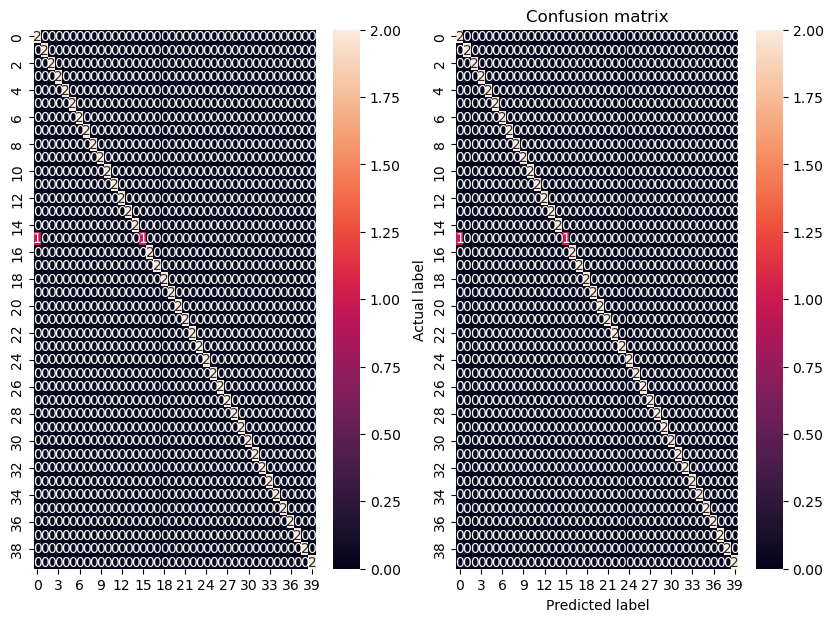

In [348]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model
    
    
    train(clf, X_train_pca, X_test_pca, y_train, y_test)



In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

model.evaluate(X_test, y_test)


Epoch 1/3


ValueError: in user code:

    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/sobral/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_12" (type Sequential).
    
    Input 0 of layer "conv2d_12" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (32, 4096)
    
    Call arguments received by layer "sequential_12" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 4096), dtype=float32)
      • training=True
      • mask=None
